In [12]:
%matplotlib inline
import pandas as pd
import sqlite3
import numpy as np

def merge(df1, df2, merge_key):
    d1 = list(df1.T.to_dict().values())
    d2 = list(df2.T.to_dict().values())
    merge_d = {}
    keys = set()
    for key in d1[0]:
        keys.add(key)
    for key in d2[0]:
        keys.add(key)
    keys.remove(merge_key)
    for data in d1:
        key = data[merge_key]
        if key not in merge_d:
            merge_d[key] = {}
            for k in keys:
                merge_d[key][k] = 0
        for k in data:
            merge_d[key][k] = data[k]
    for data in d2:
        key = data[merge_key]
        if key not in merge_d:
            merge_d[key] = {}
            for k in keys:
                merge_d[key][k] = 0
        for k in data:
            merge_d[key][k] = data[k]
    return pd.DataFrame(merge_d).T

In [18]:
c = sqlite3.connect('cost.db')
sql = '''
select sum("AMOUNT")/1000000. as expense, YEAR from cost where YEAR != 2019 group by YEAR 
'''
df = pd.read_sql(sql, c)
c.close()
df

,expense,YEAR
0,5.305037,2015
1,4.675224,2016
2,5.067250,2017
3,5.529683,2018


Text(0, 0.5, 'AMOUNT / Million')

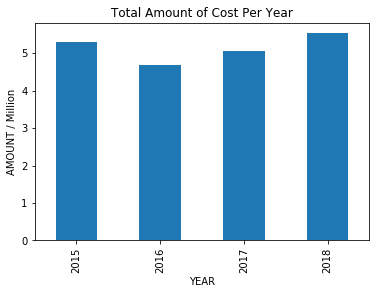

In [23]:
ax = df.plot.bar(x="YEAR", title = 'Total Amount of Cost Per Year', legend = None)
ax.set_ylabel('AMOUNT / Million')

In [354]:
c = sqlite3.connect('cost.db')
sql = '''
select sum("AMOUNT") as expense15, DESCRIPTION from cost where YEAR = 2015 group by DESCRIPTION order by expense15 desc
'''
df1 = pd.read_sql(sql, c)
c.close()
df1

,expense15,DESCRIPTION
0,1217327.43,ST SN PLOW ID CHRG FS
1,697349.64,ST SN PLOW PERM WAGES
2,623328.60,ST SN PLOW SNOW SUP
3,518595.16,ST SN PLOW LEASE EQUP
4,373190.64,ST SN PLOW OVRTM PERM
5,357934.43,SW ADM PERM WAGES
6,197865.68,ST SN PLOW HLTH INS B
7,134034.13,ST SN CROS ID CHRG FS
8,115545.20,ST SN REMV ID CHRG FS
9,105200.42,ST SN CROS PERM WAGES


In [355]:
c = sqlite3.connect('cost.db')
sql = '''
select sum("AMOUNT") as expense16, DESCRIPTION from cost 
where YEAR = 2016 group by DESCRIPTION order by expense16 desc
'''
df = pd.read_sql(sql, c)
c.close()
df

,expense16,DESCRIPTION
0,945009.09,ST SN PLOW PERM WAGES
1,779339.73,ST SN PLOW SNOW SUP
2,626014.14,ST SN PLOW ID CHRG FS
3,403084.85,ST SN PLOW OVRTM PERM
4,398316.00,ST SN PLOW SNOW REMVL
5,381375.64,SW ADM PERM WAGES
6,161114.81,ST SN PLOW HLTH INS B
7,103671.18,ST SN PLOW FICA MEDIC
8,100114.47,ST SN CROS PERM WAGES
9,91554.96,ST SN PLOW WI RET SY


In [357]:
data = merge(df1, df, "DESCRIPTION")
data.head(10)

,DESCRIPTION,expense15,expense16
ST SN PLOW ID CHRG FS,ST SN PLOW ID CHRG FS,1.21733e+06,626014
ST SN PLOW PERM WAGES,ST SN PLOW PERM WAGES,697350,945009
ST SN PLOW SNOW SUP,ST SN PLOW SNOW SUP,623329,779340
ST SN PLOW LEASE EQUP,ST SN PLOW LEASE EQUP,518595,0
ST SN PLOW OVRTM PERM,ST SN PLOW OVRTM PERM,373191,403085
SW ADM PERM WAGES,SW ADM PERM WAGES,357934,381376
ST SN PLOW HLTH INS B,ST SN PLOW HLTH INS B,197866,161115
ST SN CROS ID CHRG FS,ST SN CROS ID CHRG FS,134034,42821.6
ST SN REMV ID CHRG FS,ST SN REMV ID CHRG FS,115545,4209.24
ST SN CROS PERM WAGES,ST SN CROS PERM WAGES,105200,100114


In [326]:
c = sqlite3.connect('cost.db')
sql = '''
select sum("AMOUNT") as expense, DESCRIPTION from cost where YEAR = 2015 group by DESCRIPTION order by expense desc
'''
df = pd.read_sql(sql, c)
df = df[df["expense"] > 100000]
c.close()
df

,expense,DESCRIPTION
0,1217327.43,ST SN PLOW ID CHRG FS
1,697349.64,ST SN PLOW PERM WAGES
2,623328.60,ST SN PLOW SNOW SUP
3,518595.16,ST SN PLOW LEASE EQUP
4,373190.64,ST SN PLOW OVRTM PERM
5,357934.43,SW ADM PERM WAGES
6,197865.68,ST SN PLOW HLTH INS B
7,134034.13,ST SN CROS ID CHRG FS
8,115545.20,ST SN REMV ID CHRG FS
9,105200.42,ST SN CROS PERM WAGES


In [361]:
c = sqlite3.connect("weather.db")
sql = '''
select "MT", "TEMP AVG" from weather where YR = "2016" group by MT order by MT'''
data_frame1 = pd.read_sql(sql, c)
c.close()
data_frame1

,MT,TEMP AVG
0,2016/01,23
1,2016/02,32
2,2016/03,19
3,2016/04,41
4,2016/05,50
5,2016/06,70
6,2016/07,64
7,2016/08,73
8,2016/09,64
9,2016/10,60


In [362]:
data_frame1["TEMP AVG"].mean()

49.5

In [282]:
df = data_frame.merge(data_frame1)
temp = df[df["TEMP AVG"] <= 32]
temp

,expense,MT,TEMP AVG
0,478856.70,2015/01,23
1,1013344.93,2015/02,17
2,563367.33,2015/03,21


In [283]:
temp["expense"].mean()

685189.6533333333

In [284]:
temp["TEMP AVG"].mean()

20.333333333333332

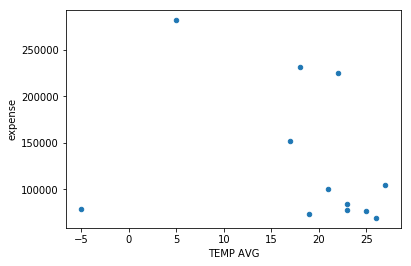

In [115]:
df.plot.scatter(x = "TEMP AVG", y = "expense")

Text(0.5, 1.0, 'Red = January, Blue = February, Yellow = March, Purple = April, Green = December')

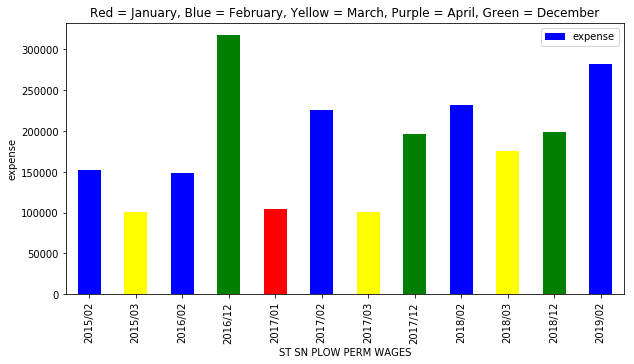

In [88]:
colors = ['blue', 'yellow', 'blue', 'green', 'red', 'blue', 'yellow', 'green', 'blue', 'yellow', 'green', 'blue' ]
ax = data_frame.plot.bar(x = "MT", y = "expense", figsize = (10, 5), color = colors)
ax.set_xlabel('ST SN PLOW PERM WAGES')
ax.set_ylabel('expense')
ax.set_title("Red = January, Blue = February, Yellow = March, Purple = April, Green = December")

Text(0, 0.5, 'Temperature Average')

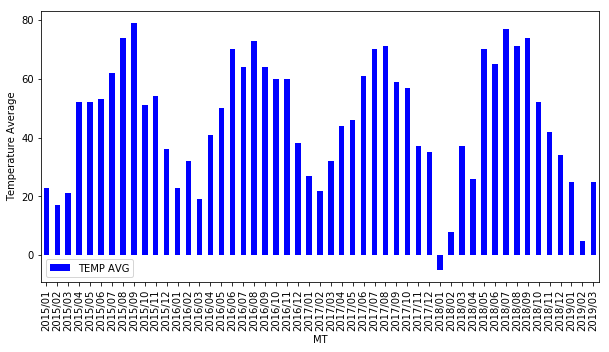

In [70]:
ax = data_frame1.plot.bar(x = "MT", y = "TEMP AVG", figsize = (10, 5), color = "blue")
ax.set_xlabel("MT")
ax.set_ylabel("Temperature Average")

In [74]:
c = sqlite3.connect("weather.db")
sql = '''
select "MT", "TEMP AVG" from weather group by MT '''
data_frame1 = pd.read_sql(sql, c)
c.close()
data_frame1 = data_frame1[data_frame1["TEMP AVG"] < 30]
data_frame1

,MT,TEMP AVG
0,2015/01,23
1,2015/02,17
2,2015/03,21
12,2016/01,23
14,2016/03,19
24,2017/01,27
25,2017/02,22
36,2018/01,-5
37,2018/02,8
39,2018/04,26


Text(0.5, 1.0, 'Red = January, Blue = February, Yellow = March, Purple = April')

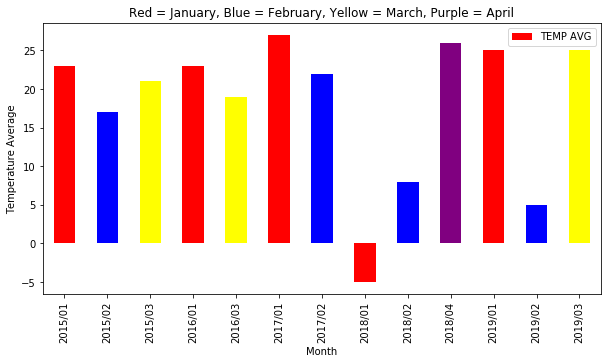

In [89]:
colors = ['red', 'blue', 'yellow', 'red', 'yellow', 
          'red', 'blue', 'red', 'blue', 'purple', 'red', 'blue', 'yellow']
ax = data_frame1.plot.bar(x = "MT", y = "TEMP AVG", color = colors, figsize = (10, 5))
ax.set_xlabel("Month")
ax.set_ylabel("Temperature Average")
ax.set_title("Red = January, Blue = February, Yellow = March, Purple = April" )

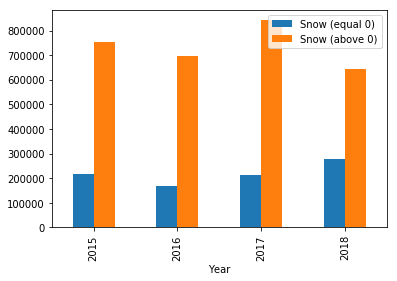

In [364]:
df = pd.DataFrame({
    "Year": [2015, 2016, 2017, 2018], 
    "Snow (equal 0)": [219085, 170044, 212641, 277199], 
    "Snow (above 0)": [754287, 696981, 841530, 644414]
})
df.plot.bar(x = "Year")

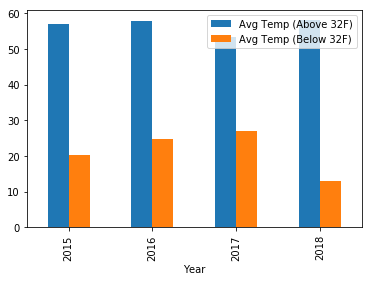

In [285]:
df = pd.DataFrame({
    "Year": [2015, 2016, 2017, 2018], 
    "Avg Temp (Above 32F)": [57, 57.78, 53.33, 58], 
    "Avg Temp (Below 32F)": [20.33, 24.66, 27.0, 13]
})
df.plot.bar(x = "Year")